<a href="https://colab.research.google.com/github/exactful/convolutional-neural-networks/blob/master/cifar_image_classification_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network for CIFAR-10**

Image classification using a Keras CNN and the CIFAR-10 tiny images dataset

In [1]:
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

In [3]:
# Define image spec
img_rows = 32
img_cols = 32
channels = 3

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Extract some validation data from the train data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# One-hot encode the output
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 13s 0us/step


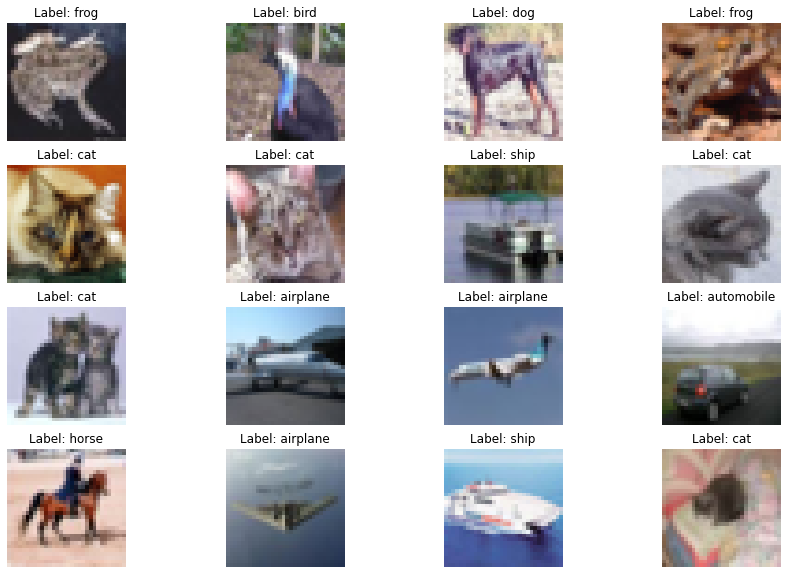

In [5]:
# Display examples
cols, rows = 4, 4
plt.subplots(figsize=(15, 10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X_train[i])
  ax.set_title(f"Label: {class_names[np.argmax(y_train[i])]}")

plt.show()

In [6]:
# Shapes
print(f"Train: {X_train.shape}\nValidation: {X_val.shape}\nTest: {X_test.shape}")

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [7]:
# Define a convolutional model
num_filters = 64
act = "relu"
reg = regularizers.l2(1e-4) # None
drop_conv = 0.4

drop_dense = 0.2
act_dense = "softmax"

opt = Adam()
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=act, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=act, kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation=act_dense))

model.compile(optimizer=opt, loss=loss, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [8]:
# Fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=True)

Epoch 1/30
1250/1250 [==============================] - 28s 13ms/step - loss: 1.7101 - accuracy: 0.4756 - val_loss: 1.3077 - val_accuracy: 0.6225
Epoch 2/30
1250/1250 [==============================] - 16s 13ms/step - loss: 1.2468 - accuracy: 0.6506 - val_loss: 1.2757 - val_accuracy: 0.6609
Epoch 3/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1404 - accuracy: 0.7146 - val_loss: 1.9230 - val_accuracy: 0.5666
Epoch 4/30
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1288 - accuracy: 0.7409 - val_loss: 1.1156 - val_accuracy: 0.7642
Epoch 5/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1385 - accuracy: 0.7617 - val_loss: 1.1590 - val_accuracy: 0.7662
Epoch 6/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1344 - accuracy: 0.7831 - val_loss: 1.1669 - val_accuracy: 0.7842
Epoch 7/30
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1353 - accuracy: 0.7996 - val_loss: 1.2455 -

In [9]:
def plot_history(hist):

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
  
  plt.subplots_adjust(hspace = 0.3)

  # Plot loss
  ax1.set_title("Cross Entropy Loss")
  ax1.set_xlabel("Epochs")
  ax1.plot(history.history["loss"], color="blue", label="train")
  ax1.plot(history.history["val_loss"], color="orange", label="test")
  ax1.legend(handles=[mpatches.Patch(color="blue", label='Train'), mpatches.Patch(color="orange", label='Validation')])

  # Plot accuracy
  ax2.set_title("Classification Accuracy")
  ax2.set_xlabel("Epochs")
  ax2.plot(history.history["accuracy"], color="blue")
  ax2.plot(history.history["val_accuracy"], color="orange")
  ax2.legend(handles=[mpatches.Patch(color="blue", label='Train'), mpatches.Patch(color="orange", label='Validation')])

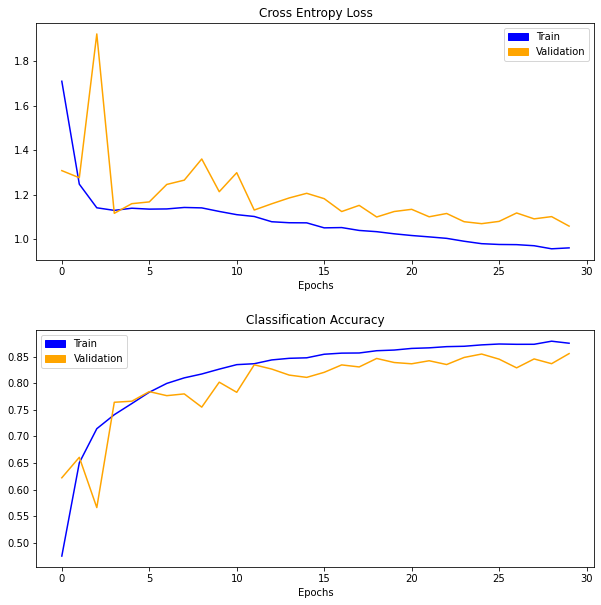

In [10]:
plot_history(history)

In [11]:
# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

313/313 [==============================] - 2s 5ms/step - loss: 1.0699 - accuracy: 0.8466
Accuracy: 84.66


In [12]:
# Get predictions on test data
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


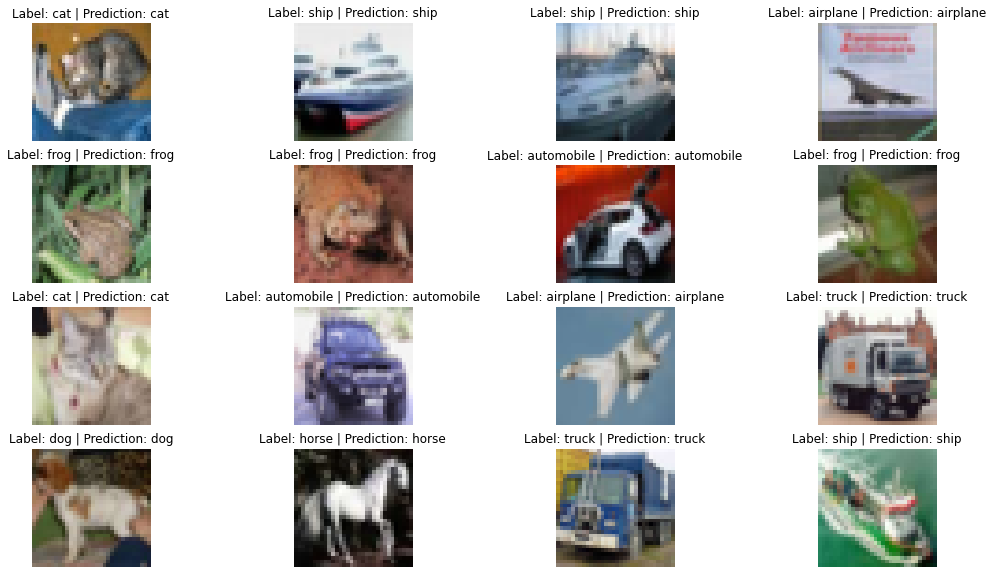

In [15]:
# Display examples with predictions
cols, rows = 4, 4
plt.subplots(figsize=(18, 10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X_test[i])
  ax.set_title(f"Label: {class_names[np.argmax(y_test[i])]} | Prediction: {class_names[np.argmax(predictions[i])]}")

plt.show()

In [16]:
# Save model in JSON
filename = "cifar-image-classification-keras-cnn"

model_json = model.to_json()
with open(f"{filename}-model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights in HDF5
model.save_weights(f"{filename}-model.h5")

In [17]:
# Load JSON and create model
json_file = open(f"{filename}-model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights(f"{filename}-model.h5")

In [ ]:
# Evaluate loaded model on test data
opt = Adam()
loss = "categorical_crossentropy"
metrics = ["accuracy"]

loaded_model.compile(optimizer=opt, loss=loss, metrics=metrics)

# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

1/1 [==============================] - 0s 15ms/step


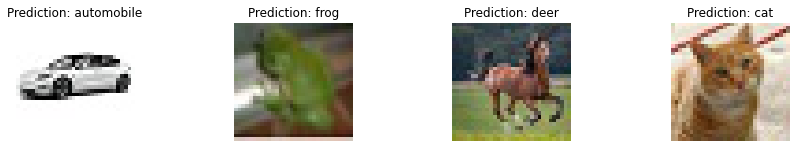

In [37]:
# Load some local images and predict on them too
from PIL import Image

test_images = []

for filename in ["car.jpg", "frog.jpg", "horse.jpg", "cat.jpg"]:
  img = Image.open(filename)
  img_arr = np.array(img).reshape(32, 32, 3)
  img_arr = img_arr / 255.0
  test_images.append(img_arr)

# Get predictions on local images
predictions = model.predict(np.array(test_images))

# Display examples with predictions
cols, rows = 4, 4
plt.subplots(figsize=(15, 10))

for i in range(len(test_images)):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(test_images[i].reshape(32,32,3))
  ax.set_title(f"Prediction: {class_names[np.argmax(predictions[i])]}")

plt.show()